In [1]:
import pathlib

data_dir = pathlib.Path('/data/road-scanner/data_extraction/data/')
image_count = len(list(data_dir.glob('**/*.jpg')))

demo = list(data_dir.glob('all_demo/**/*.jpg'))
print(f'All images {len(demo)}')

All images 12724


In [2]:
!ls ../../.results/summer2winter

assets	saved_model.pb	variables


/data/road-scanner/data_extraction/data/all_demo/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0069586--117.60145530000001-0.jpg


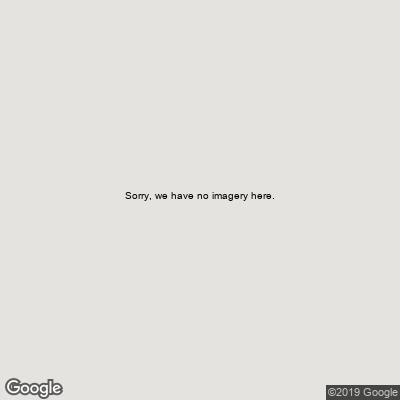

/data/road-scanner/data_extraction/data/all_demo/Fresno+California+USA-Golden+State+Hwy+Bakersfield+CA+93307+USA-36.72407517342869--119.78609147350471-270.jpg


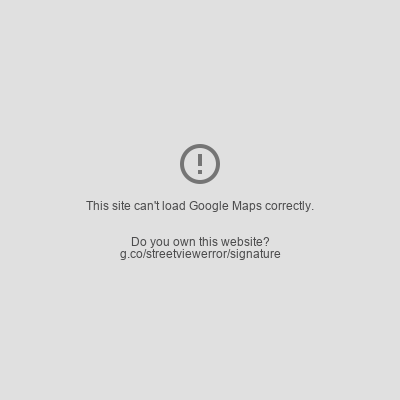

In [2]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

for image_path in demo[:2]:
    print(image_path)
    display.display(Image.open(str(image_path)))

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

2.1.0-dev20191106


In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

tfds.disable_progress_bar()
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [9]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [10]:
#checkpoint_path = "../../.results/checkpoints/train/day2dusk"
checkpoint_path = "../../.results/checkpoints/train/day2night"
#checkpoint_path = "../.results/checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')
    

Latest checkpoint restored!!


In [7]:
generator_g = tf.saved_model.load("../../.results/summer2winter")

In [13]:
def generate_images(model, test_input, image_path):
    prediction = model(test_input)
    for image in prediction:
        data = image * 0.5 + 0.5
        data = data*255.0
        data = tf.cast(data, tf.uint8)
        base = os.path.dirname(os.path.dirname(image_path))
        folder = os.path.join(base, 'night')
        #folder = os.path.join(base, 'dusk')
        #folder = os.path.join(base, 'winter')
        if not os.path.exists(folder):
            os.mkdir(folder)
        file = os.path.basename(image_path)
        full = os.path.join(folder, file)
        
        img = Image.fromarray(data.numpy(), "RGB")
        img.save(full)
        print(full)


In [14]:
for image_path in demo:
    image_file = str(image_path)
    image = tf.io.read_file(image_file)

    image = tf.image.decode_jpeg(image)
    if image.shape[2] > 3:
        continue
    image = tf.image.resize(image,[255, 255])
    image=image/255.0
    image = tf.cast(image, tf.float32)

    image = tf.reshape(image, [1, 255, 255, 3])

    generate_images(generator_g, (image-0.5)*2, image_path)

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0069586--117.60145530000001-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87729413625382--121.4465424038453-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1973742--120.09929439999998-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.163631900000006--120.14423219999999-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907121599999996--117.19141400000001-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8804729--117.08631219999998-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+Cali

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.90004917521975--117.16551639489819-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99634945566638--117.56275918701826-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1826821--120.1266687-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3056395--123.7955976-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.29226789999999--123.7939471-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307443288739314--123.79926045549837-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30742946502197

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9985697--117.5775486-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1991459--120.09639059999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.9372726--120.0401086-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877148802172904--121.44633401925854-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98959654139647--117.50614508904226-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30766570110514--123.79895214963759-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2447808--123.77

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98841549999999--117.4939588-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.162797999999995--120.14426569999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.90599163058525--117.18900921785412-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00962452458664--117.61254271701195-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237518224000006--120.02695562800054-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.170419300000006--120.14167060000001-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+US

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8769533939529--121.44610290024818-90.jpg
/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.882720299999995--122.2483348-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.239890800000005--123.77117210000002-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8769042--121.4460146-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8768173--121.44575180000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2923213--123.792798-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907240

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2400383--123.76887199999997-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2589657--123.7824892-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.20287336979706--120.09603692185475-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30766266878941--123.79895125698265-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00338610263047--117.58775150346013-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8768173--121.44575180000001-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3041456--123.7920084-9

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9072244--117.1977794-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.18472499999999--120.113454-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2349034--123.75845319999999-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.195712--120.09942470000001-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2347574--123.75904469999998-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907108--117.1984055-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24800299999999--123.7690212-90.j

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0044475--117.59462429999999-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2551148--123.7812675-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30789439016649--123.79871006572273-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877299901223246--121.44654751085557-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1642825--120.14408189999999-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8774256--121.44666549999998-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9964152124367--117.563807

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30742590286566--123.79936972322633-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9072588--117.1758555-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.01017120648858--117.61773816732651-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.923268799999995--117.26794789999998-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2634109--123.78361000000001-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1933882--120.103838-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2720469

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877299901223246--121.44654751085557-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30770512123402--123.79896375416624-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.285129--123.783806-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.242513699999996--123.7736664-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2416244--123.77368919999999-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2722864--123.7902967-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9144591--117.23289349999999-0.jpg
/data/r

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30803967359036--123.79841944242253-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.271852--123.79011949999999-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.240109--123.76843479999998-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91488971307164--117.23495750279294-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.232368099999995--123.76178409999999-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907190699999994--117.1845592-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3064416--123.79435169999999-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19507939999999--120.09992670000001-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91969869999999--117.24689649999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.2019609--120.0962922-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.2004437--120.09632359999999-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2851798--123.78843149999997-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9139623--117.2282883-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2717964--123.79005769999999-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.202467899999995--120.09617089999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8834403--117.08951640000001-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9202936--117.24816009999998-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16283790000001--120.1442273-0.jpg
/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzl

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.989364237888964--117.50215117272896-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.197990463924334--123.747648687606-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.26334229999999--123.7828858-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.272437--123.7902657-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9222734--117.25928220000002-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907151--117.1963516-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.183416099999995--12

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.90712554595904--117.19116261747749-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3075740625285--123.79892517305287-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907106299999995--117.193013-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.200407249559504--123.74766740901335-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308212999999995--123.7981014-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2341638--123.7607075-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907096747

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2477582--123.76950499999998-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.990539887253604--117.52211989680991-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.883600799999996--117.08892869999998-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.93412845205995--120.0401519075578-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.173567399999996--120.13588289999998-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2244367--123.76234930000001-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.872769399999996--117.0777382-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.20201600000001--123.75317899999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99075983697903--117.52513744110269-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.876671301150814--121.44571061162912-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.872786100000006--117.0751325-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87730566619232--121.44655261786644-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+U

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907121599999996--117.19141400000001-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.92158930000001--117.25230279999998-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877167804160244--121.44639755015181-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877065099999996--121.4461796-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.28492599999999--123.784804-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.93429622998302--120.04014131606817-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+U

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.991871119464044--117.53614657249564-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.922266799999996--117.2590735-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1629467--120.1442051-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.01023165534323--117.61877317889983-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9138668--117.2195886-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.296068999999996--123.7934978-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30887

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61313313780857--121.85423793379383-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.243879299999996--123.7710543-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.998039502930695--117.57526849279512-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.01027841914324--117.61980691602385-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.991468334990536--117.53214828970799-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907195--117.1838037-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877451313447764--121.44669337651722-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61749323376309--121.84963736586869-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98573338188881--117.48875415716759-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.003521299999996--117.59217869999999-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24174379999999--123.77373649999998-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2425703--123.77369139999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877356899341194--121.44659992529762-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.2085727--120.08987289999999-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24696559999999--123.76900859999999-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.29242500000001--123.79235999999997-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1757714--120.13563080000002-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87728260631396--121.44653218982668-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.934268344

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877225746384156--121.44646957081834-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87735127824681--121.44659455997584-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.23215799999999--123.76229449999998-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99621485659271--117.55369913456529-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.880598899999995--117.0863675-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9139623--117.2282883-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8725

/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.8837814--122.2470095-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877322961097455--121.44656793890286-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.989364237888964--117.50215117272896-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98824233507119--117.49360505863983-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1951834--120.0998038-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9864582--117.49016009999998-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+Ca

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.610788--121.8578392-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.913896199999996--117.2224607-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2447808--123.7703758-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.010338742115955--117.6257962449304-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3031605--123.79185609999999-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99658223940084--117.565880318625-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30906087164125--123.79656009784

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773028263291--120.0266983361306-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.286544899999996--123.7911336-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24183800000001--123.7737503-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0103329--117.624662-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98357--117.4839804-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9072671--117.19727700000001-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0059329763713--117

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99047970099896--117.52112124163094-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.93411457960907--120.04015380672098-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.242513699999996--123.7736664-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.284935000000004--123.78491000000001-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61329265173875--121.85404044424108-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16620329999999--120.14395189999999-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+U

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1820174--120.12816950000001-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8768445--121.4457947-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8733263--117.0787496-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87689281052667--121.44599569346809-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2554436--123.78147259999999-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237714552000014--120.02695184400102-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.224409099999995--123.762262499999

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307968572810985--123.79856004612044-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.200468--123.74783799999999-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16292190000001--120.14420179999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1993716--120.09633909999998-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2015759--123.75067399999998-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.93435200002043--120.04014070307274-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2965257--123.7934791-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99623489999999--117.5593781-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.306638799999995--123.800274-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3088242--123.79703249999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9887765--117.49496579999999-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.009897795541995--117.61462660576352-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.922891867384

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99621485659271--117.55369913456529-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99678018138735--117.5471984928469-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.240498699999996--123.77215349999999-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2344539--123.76029329999999-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877445978303996--121.44668759256783-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1681901--120.1446879-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.251042

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.306566200000006--123.7940606-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9443082--117.32992189999997-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9375722--117.3023766-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.196588--120.0993185-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773115455633--120.0268025800759-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9962318--117.55247569999999-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.87265079999

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9388541--117.302964-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.616518024945485--121.85033810226864-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.922266799999996--117.2590735-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99624--117.550864-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.299941--123.7943306-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2409027--123.7728574-270.jpg
/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.883347

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3077688--123.7989825-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2769522--123.787037-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91969869999999--117.24689649999999-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.008362299999995--117.6062082-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1982121--120.09844149999999-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877299901223246--121.44654751085557-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2722163--123.79030019999999-

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996621024418204--117.54806271981549-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.01032737445731--117.62282496118043-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877074319347884--121.44618963581834-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.6171963043955--121.84983241750155-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2426222--123.77372319999999-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0087809--117.60798039999997-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-3

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00357730963474--117.59233111423964-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877096359244455--121.44621593304036-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9370291--117.3017704-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.937356300000005--120.0401022-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.988901399999996--117.49547659999998-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16620329999999--120.14395189999999-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1928331--120.1044324-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877273699999996--121.4465243-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308372930016006--123.79782398634136-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.934226517183895--120.04014208403754-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9138707--117.21999040000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2592509--123.7826767-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.007517199999995--1

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0063891--117.599862-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.614427899999995--121.8527327-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3060458--123.7929886-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237598540000036--120.02695408000329-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.276723100000005--123.7860127-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23757176800004--120.02695459600277-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.988701600000006--11

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2397096--123.76980700000001-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9156186--117.2377721-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87663952016013--121.44569961249897-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.306638799999995--123.800274-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.165941499999995--120.14338370000002-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307711185873295--123.79896553948073-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.990247499999

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9072714--117.19745649999999-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2477586--123.76850710000001-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99177010980213--117.5351383362633-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.23496660000001--123.7582707-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87728837128407--121.44653729683567-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1628293--120.1446017-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.234356999999996--123.7

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98415159388397--117.48546592334233-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.247694599999996--123.7700443-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.6113728--121.8570803-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773015806483--120.02668344413851-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.614427899999995--121.8527327-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996533899999996--117.54854759999998-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.276679--123.784803

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.991265026427136--117.53014842017208-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.010343827515996--117.62678524567873-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1991459--120.09639059999999-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2722163--123.79030019999999-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.28512559999999--123.78812209999998-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907106299999995--117.193013-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.936061599999995--117.3010112-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87715420000001--121.44635389999999-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1777206--120.13223729999999-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.301814199999995--123.79210160000001-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.87456820178739--117.07258358403944-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98924803579649--117.50015420085933-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-3

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3062081--123.79446829999999-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1959887--120.0993328-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.876944371750085--121.44609145520408-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.998039502930695--117.57526849279512-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23757176800004--120.02695459600277-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996295492030924--117.56170665344953-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+9

/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.8828011--122.2483159-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.90712554595904--117.19116261747749-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19854799999999--120.09688969999998-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1851486--120.11220079999998-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61669930247106--121.85019056149292-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30743035556018--123.79934173874476-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.938756273524625--117.30292564812218-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.616015023272155--121.8507645282591-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0041481--117.5938748-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8725842--117.0769463-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8726552--117.07554379999999-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9351996--117.30076450000001-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2592509--

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8773344149614--121.44657846401424-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9230163--117.25911789999998-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.007562188368404--117.60336462317456-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91684534006747--117.24121660276927-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1719787--120.13750029999999-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.992286099999994--117.54056519999999-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99658223940084--117.565880318625-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99621485659271--117.55369913456529-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.989188771700405--117.49914011021355-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2970134--123.79347860000001-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.306638799999995--123.800274-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.872786100000006--117.0751325-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+Californ

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24134259999999--123.7734875-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1958102--120.09939019999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.169207--120.1431277-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.28537430000001--123.78243789999998-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24151150000001--123.7736249-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.987451400000005--117.4920823-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308797281690715--123.79707

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1924286--120.10476369999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1825559--120.1195277-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.25122999999999--123.777532-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.17470670000001--120.1370107-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.305406--123.7968783-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9963099--117.5620811-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.008288799999995--117.6059227999

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30841379182601--123.79775238951355-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9838407--117.48456709999998-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30644992468344--123.79858817349282-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61313313780857--121.85423793379383-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0038456--117.5930612-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.936061599999995--117.3010112-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.2375806

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.28512559999999--123.78812209999998-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.256844099999995--123.7818733-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87704166659366--121.44616890126764-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.196588--120.0993185-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2477586--123.76850710000001-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9071115--117.19858280000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3056768--123.79533070000001-90

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87696241615565--121.44611434529617-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61424273066353--121.8528449086096-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.004251150896245--117.59413276951128-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2399841--123.7713737-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3088768369624--123.79692743599178-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19762299999999--120.0992084-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19300630000001--

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.285036--123.785415-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61264955592537--121.85482484479567-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30767176573738--123.79895393494793-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996226114950474--117.55270510153008-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.276723100000005--123.7860127-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.984546288663786--117.48632714060481-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19811

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.899258459569886--117.16261111364545-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.197914399999995--123.7474211-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.201861--123.752598-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8902509--117.108779-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1659187--120.14336979999997-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996225060531714--117.55669276374253-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.182017

/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.8829644--122.2481613-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1691198--120.1432398-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87721086957085--121.44645250623509-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.92193180733847--117.25414291818512-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87730566619232--121.44655261786644-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2970651--123.79347380000002-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2740878--123.79054769999999-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.35313417228356--119.03355837043816-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16539900000001--120.1434256-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8769042--121.4460146-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996262300000005--117.5504983-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.6174349269458--121.84813496011876-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.882273999999995--117

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2970651--123.79347380000002-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.991061683787244--117.52814854795308-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.23587799999999--123.75746190000001-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.165897099999995--120.14336459999998-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9144591--117.23289349999999-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.173716--120.13580390000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+9492

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87664638862265--121.44570243707918-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308212999999995--123.7981014-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61424273066353--121.8528449086096-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61249551711143--121.85503416928488-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00289347080633--117.59053369374888-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9152452--117.23647489999999-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1752673--12

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877477989159985--121.44672229627314-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.18348239999999--120.124541-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99205707685866--117.53812205392636-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.873848800000005--117.07947829999999-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9889901--117.49603630000001-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9962096--117.55511879999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.989891799999995--117.5112037-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2917584--123.79332720000001-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.296198999999994--123.79348080000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.251356--123.776041-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16543430000001--120.1433977-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.250898--123.776913-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91810608237508--117.243920195206

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1914885--120.10455909999999-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8804729--117.08631219999998-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30743035556018--123.79934173874476-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773165275655--120.0268621480452-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.182191700000004--120.1278562-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30765357184388--123.79894857901878-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61438589999999--121.85265729999999-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9210414--117.25016570000001-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87660517788438--121.44568548962079-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00323546860148--117.59144145217512-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8821061--117.0947616-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23764316000004--120.02695322000329-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1670726--120.14460580000001-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0084683--117.60661969999998-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877477989159985--121.44672229627314-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.23548769999999--123.758053-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.162897--120.1442032-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1826752--120.11956239999999-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.284995099999996--123.7865

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1840605--120.11532220000001-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61730504469839--121.84976098665979-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19480850000001--120.10037299999999-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.987451400000005--117.4920823-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2968349--123.79316209999999-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.306317899999996--123.7932006-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.93425440

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2766563--123.7856851-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2342928--123.760563-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87730566619232--121.44655261786644-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2962828--123.7934683-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1681901--120.1446879-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3001079--123.79341009999997-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2769834--123.787469-180.jpg
/data/road-scanner/data_extraction/dat

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.934142324510766--120.04015000839384-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.194283--120.10186739999997-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00694423805373--117.60141345995027-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8773796--117.0831289-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.25117099999999--123.776587-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9219752--117.2544022-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.616518024945485

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.991061683787244--117.52814854795308-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8761402--117.0818422-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30810299999999--123.79829589999999-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2542676--123.78068080000001-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23767885600004--120.0269525320025-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00814245484616--117.60535487736533-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1928331--120.1044324-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1983878--120.09724870000001-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2965796--123.7926471-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.94387770000001--117.3300794-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.184046152208104--120.1167341154383-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.90372519999999--117.17146369999999-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30885843

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.284926899999995--123.784702-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61297170924606--121.85443191026872-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907139--117.19874109999999-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.196461899999996--120.09931200000001-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.20137346074975--123.74991081734726-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1629992--120.1442296-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.59507309730477--121.84

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.194942999999995--120.10012409999999-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0066090678468--117.60045510608303-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1736204--120.1358722-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.25818162014252--123.78218353887745-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1983878--120.09724870000001-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8826814519965--117.09501821558509-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+Califo

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.987451400000005--117.4920823-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237714552000014--120.02695184400102-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.272437--123.7902657-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237705628000015--120.02695201600145-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1737487--120.1358296-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00550030000001--117.59749230000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.250898--123.776913-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.165897099999995--120.14336459999998-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2915862--123.79345149999997-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9888429--117.49521779999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9221608--117.2559392-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.29992070000001--123.79444799999999-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.18472499999999--1

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877407489173294--121.44664821322172-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.90720582963711--117.18263280240534-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.989188771700405--117.49914011021355-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2320949--123.76240299999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.17095022280195--120.14100610225955-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.182632399999996--120.1197302-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1659856--120.1434448-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2425703--123.77369139999999-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2850089--123.784244-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1940738--120.1025092-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99059805441532--117.52311753776837-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9223992--117.2634779-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.162898299999995--120.144632499999

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16292190000001--120.14420179999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.992211600000005--117.53991160000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.297446799999996--123.7941385-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2396725--123.77033390000001-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8805772--117.08635260000001-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9215683--117.2522075-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.29242500

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.305548900000005--123.79264250000001-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9072714--117.19745649999999-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1817399--120.11975249999999-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.272777399999995--123.79016919999998-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.35313113502749--119.0333954162491-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2017729--123.75226699999999-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.306570199999996--123.793612-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.009716--117.6131973-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.01000973678262--117.61570356939968-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.231879--123.7625808-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2356367--123.75796240000001-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30803967359036--123.79841944242253-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.197266899999995--120.099

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.240327750537375--123.76682703849785-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1911226--120.1045712-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1825033--120.12714499999998-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98959654139647--117.50614508904226-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23761638800005--120.02695373600343-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877493994582--121.4467396481339-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.269

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.170419300000006--120.14167060000001-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2920909--123.7931302-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308020952305654--123.79845596536893-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87736252043517--121.44660529062001-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.93426834496436--120.04014162256553-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996239154184885--117.55966104394435-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877282606

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1691198--120.1432398-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87734565715205--121.44658919465465-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9152452--117.23647489999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1745156--120.13678259999999-180.jpg
/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.8834151--122.2475947-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.20137--123.749902-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+Californi

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.877746200000004--117.0834936-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877154430318974--121.44635463899823-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9373897--117.3021942-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907108--117.1984055-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.988901399999996--117.49547659999998-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877108458011115--121.44623580958134-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9838685-

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1914885--120.10455909999999-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16539900000001--120.1434256-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61616715415333--121.85063285442013-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2999103--123.79426079999999-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19762299999999--120.0992084-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.251356--123.776041-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.897738950948664--117.15

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2320949--123.76240299999999-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98382389999999--117.4845249-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.292268799999995--123.7929348-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2717964--123.79005769999999-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9138707--117.21999040000001-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00886585969161--117.60837427181444-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.87455029

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1700516--120.1421161-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907131091892516--117.19401563812836-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.202079--123.75343599999998-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9922715--117.5405336-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2733604--123.79019640000001-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0091667--117.60983800000001-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87735127824681--121.44659

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996927899999996--117.5463905-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.20234119901975--123.75459224608858-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30544919999999--123.79822229999999-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99029916299303--117.51812527151893-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19300630000001--120.10427320000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2919609--123.79393950000001-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+Ca

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.263356900000005--123.783948-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1679056--120.1454079-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.301814199999995--123.79210160000001-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9218097--117.25221300000001-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9939569--117.54203229999997-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.195001--120.1000313-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2769397--123.786713999999

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91389649491287--117.22250090039735-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2015759--123.75067399999998-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308615629271415--123.79739835214859-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.170419300000006--120.14167060000001-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.162897--120.1442032-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2329304--123.7616343-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8777462

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87693139999999--121.44607500000001-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877317196129425--121.4465628318901-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8773344149614--121.44657846401424-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.6140982--121.85303429999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1670726--120.14460580000001-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.93401747245133--120.04016710084274-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3056135--123.795738399999

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8795223--117.0853348-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.6127--121.85475840000001-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16283790000001--120.1442273-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1911226--120.1045712-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.247724999999996--123.769662-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1825033--120.12714499999998-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61520132756891--121.85167688622366-180.jpg
/d

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8727173--117.07532669999999-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877121599999995--121.44625740000001-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1868538--120.1119564-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99639679999999--117.54921189999997-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307659636473964--123.79895036432787-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9071211--117.2008639-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8992

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61638140000001--121.8504493-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2721597--123.7902944-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.201861--123.752598-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1940738--120.1025092-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.240498699999996--123.77215349999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.988327--117.49377009999999-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.193277599999995--120.1039775-180.jpg
/data/road-sc

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.988595--117.4943926-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237729908922994--120.02665366015444-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.285184--123.783587-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2967789--123.79347119999998-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8768792--121.44597309999997-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.25122999999999--123.777532-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23761638800005--120.02695373600343-180

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3063389--123.7944241-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87696241615565--121.44611434529617-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9889415--117.4956929-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.877225746384156--121.44646957081834-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99006162886383--117.51413286111485-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.243964--123.771805-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.934156196961546--120.0401481092291

/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61701070298426--121.84995433740644-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.945619171019885--117.32988821410314-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61653687410856--121.85032276107825-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8768173--121.44575180000001-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2396725--123.77033390000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.305330500000004--123.7980448-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1846138--120.113801900000

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0069586--117.60145530000001-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.285309--123.7889836-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9972705--117.57124449999999-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773028263291--120.0266983361306-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98357--117.4839804-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3056768--123.79533070000001-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.247694599999996--123.770044

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16739659999999--120.1455428-90.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23772953519601--120.02660898417857-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907094199999996--117.19963800000001-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2770647--123.787691-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0087809--117.60798039999997-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.256844099999995--123.7818733-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.614385899999

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.162898299999995--120.14463249999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.934170069412254--120.04014621006374-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99439461325671--117.54215248485498-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.232368099999995--123.76178409999999-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2717964--123.79005769999999-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.87689281052667--121.44599569346809-270.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.17470670000001--120.1370107-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.876944371750085--121.44609145520408-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.299773689546676--123.79456678146855-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.202132899999995--123.753652-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.87298169999999--117.0746849-0.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.876994820116174--121.44614370382048-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1630536--12

/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30853489447311--123.79753996724986-270.jpg
/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.8835601--122.24735339999998-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00814245484616--117.60535487736533-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.242445599999996--123.77365040000001-180.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2915841--123.79336980000001-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2421508--123.7736899-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+C

/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.9340036--120.04016899999999-0.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.2019609--120.0962922-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2015759--123.75067399999998-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.618057799999995--121.84926649999998-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.306329600000005--123.79855330000001-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.297509091194605--123.79415434686544-90.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-36.61181541625312--121.85615277

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99623489999999--117.5593781-180.jpg
/data/road-scanner/data_extraction/data/night/Sand+City+California+USA-Gorda+California+93920+USA-35.8771811159334--121.44641837708373-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.197874999999996--120.09902199999999-90.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00323546860148--117.59144145217512-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.272006--123.79023810000001-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1747856--120.13691209999999-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.992307499999995--117.54069530000001-180.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.176447599999996--120.1346309-270.jpg
/data/road-scanner/data_extraction/data/night/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.173716--120.13580390000001-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.27200829999999--123.78943299999999-270.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8733263--117.0787496-90.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2244734--123.762417-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30544919999999--

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9388541--117.302964-180.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9218097--117.25221300000001-0.jpg
/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9223346--117.2614852-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2475867--123.7703638-90.jpg
/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.883131999999996--122.2479802-180.jpg
/data/road-scanner/data_extraction/data/night/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.8829644--122.2481613-0.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+

/data/road-scanner/data_extraction/data/night/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996209--117.55110850000001-270.jpg
/data/road-scanner/data_extraction/data/night/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2634441--123.7825345-180.jpg


In [11]:
for image_path in demo:
    image_file = str(image_path)
    image = tf.io.read_file(image_file)

    image = tf.image.decode_jpeg(image)
    if image.shape[2] > 3:
        continue
    image = tf.image.resize(image,[255, 255])
    image = tf.cast(image, tf.uint8)
    #print(image)
    
    base = os.path.dirname(os.path.dirname(image_path))
    folder = os.path.join(base, 'original')
    if not os.path.exists(folder):
        os.mkdir(folder)
    file = os.path.basename(image_path)
    full = os.path.join(folder, file)

    img = Image.fromarray(image.numpy(), "RGB")
    img.save(full)
    print(full)
    

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0069586--117.60145530000001-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87729413625382--121.4465424038453-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1973742--120.09929439999998-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.163631900000006--120.14423219999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907121599999996--117.19141400000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8804729--117.08631219999998-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.29226789999999--123.7939471-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307443288739314--123.79926045549837-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30742946502197--123.79934733564042-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.20089900000001--123.748935-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9156186--117.2377721-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00927549633854--117.61044647572854-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+Califor

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30766570110514--123.79895214963759-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2447808--123.7703758-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9223346--117.2614852-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1755916--120.13586149999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.23995060000001--123.7713058-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308913644026354--123.79685396844481-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23757176800004--120.02695459600277-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30742323124482--123.79938651391929-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.249176647976775--123.77770459581997-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1840605--120.11532220000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.251343--123.77765699999998-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87700712058438--121.44615312898885-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+1

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.611558285471645--121.85669322050182-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1694306--120.14283779999998-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9864582--117.49016009999998-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.990959999688556--117.52714861083824-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.989887869951204--117.51113658727661-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30765660415878--123.79894947167323-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Go

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307431246098055--123.79933614184947-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.198004299999994--120.09887599999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.184080900000005--120.11887050000001-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907225983412935--117.17978953200206-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.197972199999995--123.74758709999999-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.882934799999994--117.0883707-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Vall

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2551148--123.7812675-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30789439016649--123.79871006572273-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877299901223246--121.44654751085557-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1642825--120.14408189999999-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8774256--121.44666549999998-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9964152124367--117.56380741802695-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3069127--123.7987223-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30821114657808--123.79810467719672-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1627687--120.14431739999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773227546417--120.02693660800749-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907106--117.19849369999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.29316003624186--123.7941771464002-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+Califo

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8769042--121.4460146-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.243927899999996--123.77129900000001-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30636899999999--123.79440930000001-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.28897129999999--123.79463849999999-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2554966--123.78150579999999-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907108--117.1984055-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1654679-

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.184497799999995--120.11413359999997-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87742435244377--121.44666430920763-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.234356999999996--123.76047870000001-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.297098399999996--123.7937892-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2694289--123.78402100000001-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1826821--120.1266687-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61181541625312--121.85615277708557-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9210414--117.25016570000001-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99196717203444--117.5371219763776-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2243552--123.76008900000001-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.92235480000001--117.26218289999998-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.20287336979706--120.09603692185475-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1776558--120.1323744-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.989364237888964--117.50215117272896-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.197990463924334--123.747648687606-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.26334229999999--123.7828858-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.272437--123.7902657-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9222734--117.25928220000002-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308212999999995--123.7981014-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2341638--123.7607075-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907096747005305--117.20254036221473-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61688057977987--121.85004302005181-90.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.616015023272155--121.8507645282591-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3059684--123.7945469-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19854799999999

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2965257--123.7934791-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.195596599999995--120.09948270000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308595445594314--123.7974337559433-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1628738--120.14462649999999-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30791261180673--123.79867321615531-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3024434--123.79192019999999-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+Cali

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99035933185553--117.51912392938921-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1930005--120.1042771-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0063891--117.599862-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.285387993277574--123.78150785268576-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.9340036--120.04016899999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.165897099999995--120.14336459999998-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.59507309730477--121.84888710433817-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307431246098055--123.79933614184947-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773015806483--120.02668344413851-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.936464--117.3012741-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.177551199999996--120.13257540000001-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8761402--117.0818422-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+1

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30766873342112--123.7989530422927-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2997331--123.7940176-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1840605--120.11532220000001-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773215092645--120.02692171601494-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1961344--120.09931809999998-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2694289--123.78402100000001-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2477586--123.76850710000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30803967359036--123.79841944242253-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.231879--123.7625808-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98698306013186--117.49117588042539-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00524329999999--117.5968216-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8774566485911--121.44669916046723-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9891171--117.49798890000001-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.284943899999995--123.78456-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1629708--120.1442131-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.183416099999995--120.11888830000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9228114--117.2771245-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.995444578446545--117.54244621462247-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+Califo

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.614646--121.8531545-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2722864--123.7902967-90.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877368141528784--121.44661065594305-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9445048--117.32989659999998-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8725764--117.07600079999999-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61733510992698--121.84974123695399-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3010448--123.792513-270.

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1757714--120.13563080000002-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8782558--117.0840206-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8732637--117.0742434-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99087719999999--117.5263342-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.271902399999995--123.789577-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9210414--117.25016570000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+US

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61733510992698--121.84974123695399-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8730032--117.0782629-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16539900000001--120.1434256-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.240327750537375--123.76682703849785-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00886585969161--117.60837427181444-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9370291--117.3017704-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+Califor

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2777679--123.78779399999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.246764899999995--123.7691469-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.29284299999999--123.79404090000001-90.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877065099999996--121.4461796-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.88209150469522--117.09460430196485-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.613926612266916--121.85324771731369-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.305330500000004--123.7980448-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0090787439672--117.60939862667377-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.882464399999996--117.0879761-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.243958--123.77158299999998-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3077020889148--123.79896286150924-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1820174--120.12816950000001-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9891925--117.49919999999999-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.989364237888964--117.50215117272896-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1653981--120.14343840000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2721872--123.79029849999998-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1995009--120.0963205-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2721093--123.79028040000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2349034--123.75845319999999-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.20154--123.750419-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.162898299999995--120.14463249999999-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.6119744--121.85588499999999-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.617877127682746--121.8493851850568-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2716797--123.7899081-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1850819--120.11238279999

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0103329--117.624662-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.25135199999999--123.77626199999999-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8805772--117.08635260000001-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1825559--120.1195277-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1954211--120.0995967-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.263319499999994--123.78303600000001-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87739624

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0103638--117.63278799999999-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2970651--123.79347380000002-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23772953519601--120.02660898417857-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9221608--117.2559392-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99214417112597--117.53910642457262-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19377387347305--120.10319445784188-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877167804160244--121.44639755015181-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2711179--123.7847697-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99167160947756--117.53414815655823-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907225983412935--117.17978953200206-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.17373289999999--120.13581539999998-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.20213210000001--120.09625140000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodeg

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0087809--117.60798039999997-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996214239915965--117.55568650382223-270.jpg
/data/road-scanner/data_extraction/data/original/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.883131999999996--122.2479802-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.616901--121.85002639999999-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.010125599999995--117.61704250000001-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87702439358897--121.44616101512638-180.jpg
/data/road-scanner/data_extraction/data/original/Mend

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.615039941583916--121.85187092799526-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.944363599999996--117.32991179999999-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24190300000001--123.77375049999999-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23755392000003--120.02695494000218-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.883814799999996--117.0984491-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.250844--123.777279-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2396989--123.77019449999997-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.892710199999996--117.1181139-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.989480406422125--117.50414813545744-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2726389--123.7902006-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877273699999996--121.4465243-270.jpg
/data/road-scanner/data_extraction/data/original/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.883510099999995--122.24743369999999-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+Califor

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1988351--120.09655899999998-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907209699999996--117.19902110000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99708203738337--117.57001474869412-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.242352499999996--123.77364879999999-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99644417406602--117.54898235743431-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237731901845294--120.02689193203004-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beac

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0090787439672--117.60939862667377-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1818466--120.1197577-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.991061683787244--117.52814854795308-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.87623947787672--117.08194462455847-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877493994582--121.4467396481339-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.92236567163379--117.26251917301774-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61756750692115--121.84958857588097-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.256311000000004--123.78175519999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99625716586411--117.56071074650157-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.251323899999996--123.77595900000001-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1928331--120.1044324-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.23183229042899--123.76263919782149-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+Califor

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87663265170005--121.44569678792027-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2766508--123.78551249999998-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2633984--123.7835027-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30835259510085--123.7978592592985-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.991265026427136--117.53014842017208-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.010343827515996--117.62678524567873-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+Californi

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9880361917819--117.50848898430218-90.jpg
/data/road-scanner/data_extraction/data/original/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.88286604623358--122.24824981674382-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9941616--117.54208729999999-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87747265401844--121.44671651232079-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2722864--123.7902967-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237731279109234--120.02681747206817-180.jpg
/data/road-scanner/data_extraction/data/original/Ki

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.20089900000001--123.748935-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2921974--123.79304159999998-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2396899--123.7700455-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1677301--120.14519349999999-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2017729--123.75226699999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.273446899999996--123.79021920000001-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.25818162014252--

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2475443--123.76846859999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9392873--117.30302839999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.88092831498401--117.08665154425731-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877167804160244--121.44639755015181-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9036701--117.1714109-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87686931631684--121.44593074135031-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+US

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1630688--120.1445091-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773003349486--120.0266685521465-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99826029467652--117.57624332281391-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8779592--117.0837165-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2347574--123.75904469999998-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.984900084623--117.48713786495607-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237625312000034--120.0269535640034-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.305572--123.7983359-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996295492030924--117.56170665344953-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.611558285471645--121.85669322050182-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30544919999999--123.79822229999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1755916--120.13586149999999-90.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+9

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30799509999999--123.7985064-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.164387--120.14405909999999-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996219329170025--117.55172777380663-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2999103--123.79426079999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2396899--123.7700455-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.271963199999995--123.7902112-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8765983094366--121.44568266504973-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.301153--123.7924608-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8737773--117.07927079999999-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.990959999688556--117.52714861083824-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1924286--120.10476369999999-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1825559--120.1195277-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.251

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.992307499999995--117.54069530000001-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907095299999995--117.1994985-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.165957500000005--120.14339759999999-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.914071--117.2297107-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.234542999999995--123.76004249999998-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.03760797686429--117.61450806687002-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bod

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1959887--120.0993328-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2735757--123.7902562-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.235942--123.757121-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.285001--123.78608299999999-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.876944371750085--121.44609145520408-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8731627--117.07852539999998-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1760812--120.1352067999

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9366487--117.3014055-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.883814799999996--117.0984491-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.176297999999996--120.1348855-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.197990463924334--123.747648687606-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.992307499999995--117.54069530000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.992211600000005--117.53991160000001-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+R

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.169816--120.14238320000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2592509--123.7826767-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19377387347305--120.10319445784188-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91684534006747--117.24121660276927-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3016631--123.7921683-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.242297099999995--123.7736571-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307883000000004--123.79873309999998-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2969593--123.7934778-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.169559899999996--120.14267900000002-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99116335936676--117.5291484843978-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16287260000001--120.1442094-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61616715415333--121.85063285442013-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+Calif

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.302240999999995--123.79196979999999-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.881928699999996--117.1043911-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996533899999996--117.54854759999998-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.182302899999996--120.12762620000001-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.285309--123.7889836-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8731627--117.07852539999998-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3076899596406--123.7989592908828-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.01033526698053--117.62382651272999-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8728338--117.0779038-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.882464399999996--117.0879761-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.305792--123.7947366-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996533899999996--117.54854759999998-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+19

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877477989159985--121.44672229627314-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2924059--123.79396260000001-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8732637--117.0742434-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.92002939999999--117.2475655-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8737773--117.07927079999999-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8725842--117.0769463-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9919413--117.53683420000002-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.2377324--120.02695150000001-90.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.610788--121.8578392-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877121599999995--121.44625740000001-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.29166610000001--123.7933597-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.93769743631893--117.30244777929224-180.jpg
/data/road-scanner/data_extraction/data/original/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Gr

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2017729--123.75226699999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.934183941862905--120.04014431089756-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98415159388397--117.48546592334233-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.284943899999995--123.78456-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8766189147873--121.44569113876746-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.170133199999995--120.1420191-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30769299195874--123.7989601835392-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.309005661405855--123.79667029939576-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1630185--120.1445897-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.305548900000005--123.79264250000001-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1961344--120.09931809999998-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.241971899999996--123.7737373-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+US

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.937652--120.03988400000001-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.301073699999996--123.792496-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87724062319387--121.44648663540663-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98357--117.4839804-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91569864849989--117.23804593478516-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24151150000001--123.7736249-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99709939999999--117.57014089999998-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.936464--117.3012741-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8772768413435--121.44652708281829-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2777679--123.78779399999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1840605--120.11532220000001-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61730504469839--121.84976098665979-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+9615

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24167559999999--123.77371070000001-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99648992788725--117.56480708125552-90.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61156969999999--121.8566694-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8805772--117.08635260000001-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237625312000034--120.0269535640034-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8772555--121.44650370000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.251323899999996--123.77595900000001-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307650539529234--123.79894768636446-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308020952305654--123.79845596536893-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307650539529234--123.79894768636446-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.934072962256096--120.04015950420616-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2732994--123.79018359999998-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+Califo

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.92239299999999--117.26336459999999-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.269583499999996--123.78755650000001-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2589657--123.7824892-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1627496--120.14440989999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.907205999999995--117.1826055-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.306570199999996--123.793612-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.90720582963711--117.18263280240534-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98781504833601--117.49278149191443-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2726892--123.7901873-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24134259999999--123.7734875-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.299862299999994--123.79450759999997-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24183800000001--123.7737503-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1736204--120.1358722-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.25818162014252--123.78218353887745-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1983878--120.09724870000001-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8826814519965--117.09501821558509-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.166537100000006--120.14415120000001-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.305743299999996--123.79491089999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+923

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.612113--121.85563049999999-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.87256370000001--117.076706-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3058211--123.79467220000001-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3056135--123.79573839999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30769299195874--123.7989601835392-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307711185873295--123.79896553948073-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00352

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2766508--123.78551249999998-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9070983--117.20178-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87747265401844--121.44671651232079-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237518224000006--120.02695562800054-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.164387--120.14405909999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3053926--123.79814850000001-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+U

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996226114950474--117.55270510153008-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2850119--123.78594199999999-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1639921--120.1441433-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9223992--117.2634779-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237598540000036--120.02695408000329-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1946459--120.10076620000001-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+1

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.305304799999995--123.79799340000001-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9918822--117.53625660000002-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.247859999999996--123.7685655-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.285184--123.783587-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2583567--123.7822243-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8768792--121.44597309999997-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.6136087261447--121.85364309381174-1

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2017729--123.75226699999999-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9848487--117.48703820000001-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2549258--123.78113059999998-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23773152820934--120.02684725605283-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1777206--120.13223729999999-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.899258459569886--117.16261111364545-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+Californ

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2931373--123.7941669-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2480776--123.7688567-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61701070298426--121.84995433740644-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2575484--123.7820296-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.615673035496165--121.85111786714894-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.235917--123.7573045-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307426793405256--123.79936412632938-90.jpg
/data/r

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61345060018903--121.8538413408246-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.010320199999995--117.62197239999999-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.2022666--120.0962212-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.251303--123.77638999999999-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1627819--120.14429009999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.27733969999999--123.78774349999998-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+961

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2243552--123.76008900000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91569864849989--117.23804593478516-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307443288739314--123.79926045549837-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1840504--120.11715919999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23765208400003--120.02695304800315-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.935701--117.30080199999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+9

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1699991--120.14217850000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2987014--123.7951541-90.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8766606522443--121.44570798207178-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.6118062--121.85616829999998-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.296951199999995--123.7933123-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8744525--117.0800982-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307949055038875--123.7985

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61181541625312--121.85615277708557-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1914885--120.10455909999999-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16539900000001--120.1434256-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61616715415333--121.85063285442013-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2999103--123.79426079999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.19762299999999--120.0992084-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2320949--123.76240299999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98382389999999--117.4845249-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.292268799999995--123.7929348-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2717964--123.79005769999999-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9138707--117.21999040000001-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00886585969161--117.60837427181444-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+Calif

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.20130650000001--120.09632909999999-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87748332430111--121.44672808022615-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.182302899999996--120.12762620000001-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61156969999999--121.8566694-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.255583400000006--123.78154760000001-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9202936--117.24816009999998-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-C

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9891925--117.49919999999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9962535--117.5606155-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9864582--117.49016009999998-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.615039941583916--121.85187092799526-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.306570199999996--123.793612-0.jpg
/data/road-scanner/data_extraction/data/original/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.883824499999996--122.24696859999999-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30742323124482--123.79938651391929-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98892797647899--117.49561995367038-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1824011--120.1274038-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.876671301150814--121.44571061162912-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.308212999999995--123.7981014-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2345921--123.75984599999998-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.249176647976775--123.77770459581997-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.16287260000001--120.1442094-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.35313417228356--119.03355837043816-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.92235480000001--117.26218289999998-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-36.61424273066353--121.8528449086096-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.88354660019148--117.10244825934164-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+US

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237705628000015--120.02695201600145-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87725549999999--121.44650370000001-180.jpg
/data/road-scanner/data_extraction/data/original/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.882720299999995--122.2483348-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877451313447764--121.44669337651722-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1629467--120.1442051-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1953258--120.0996727-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junc

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.899258459569886--117.16261111364545-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9881671--117.4934584-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9210323--117.25013569999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2480167--123.7687183-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2342928--123.760563-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.182302899999996--120.12762620000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8769533939529--121.44610290024818-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8902815--117.11152369999999-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.162797999999995--120.14426569999999-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1736204--120.1358722-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.198112699999996--120.0986959-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2475443--123.76846859999999-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+Califor

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.988229099634864--117.50849189423356-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.23758961600003--120.02695425200314-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99177010980213--117.5351383362633-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87660517788438--121.44568548962079-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2243789--123.7601488-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2357867--123.7577295-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+Cali

/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.192391--120.10468929999999-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8770064--121.4461528-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.937652--120.03988400000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.290823321174415--123.79296530108003-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2996839--123.7939585-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2737738--123.79033969999999-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.2019609--120.096

/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877467318876434--121.446710728369-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.24766350000001--123.77022040000001-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2339608--123.7608953-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00282038705918--117.58765231419103-270.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877407489173294--121.44664821322172-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.197854400000004--123.74726969999999-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.87718

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.010269699999995--117.6195367-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0099964--117.6155367-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3065371--123.79419609999998-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.234356999999996--123.76047870000001-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8726552--117.07554379999999-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9071789--117.1990855-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.28897129999999--123.79463849999999-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.296068999999996--123.7934978-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307711185873295--123.79896553948073-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2416244--123.77368919999999-90.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.877121599999995--121.44625740000001-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.250861--123.77705200000001-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.98698306013186--117.49117588042539-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.299960500000005--123.7935907-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2741851--123.79066139999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.237732026386816--120.02690682402248-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.30767479805392--123.79895482760335-0.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.17470670000001--120.1370107-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+Californ

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.27209219999999--123.7893033-270.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.307883000000004--123.79873309999998-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.914273309580274--117.23162909359084-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2726389--123.7902006-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.99849954074211--117.57725460051546-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1660604--120.143695-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+U

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2339608--123.7608953-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.9397534--117.30314639999999-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.988701600000006--117.49470450000001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2396725--123.77033390000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.00391082478184--117.59323662596735-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.18407--120.11782620000001-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+

/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2350416--123.7581735-0.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.2323242--123.76186150000001-270.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0087809--117.60798039999997-270.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-38.93400360000001--120.04016900000002-90.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.20085782528128--123.74884075500925-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.996214443475694--117.5587002707829-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+

/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.91391659999999--117.2266439-180.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.8773850048073--121.44662675191587-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.882934799999994--117.0883707-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1677301--120.14519349999999-180.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-35.0069586--117.60145530000001-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+California+96150+USA-39.1736587--120.13582059999997-90.jpg
/data/road-scanner/data_extraction/data/original/Kings+Beach+California+USA-Camp+Richardson+

/data/road-scanner/data_extraction/data/original/origin=1415+Summit+Rd+Berkeley+CA+94708+USA&-destination=4348+Grizzly+Peak+Blvd+Berkeley+CA+94705+USA&-37.8823367--122.24834580000001-0.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8725563--117.0763176-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.8745502996923--117.07260642077058-90.jpg
/data/road-scanner/data_extraction/data/original/Death+Valley+Junction+California+92328+USA-CA+190+California+USA-34.88187270988636--117.10456996124474-0.jpg
/data/road-scanner/data_extraction/data/original/Sand+City+California+USA-Gorda+California+93920+USA-35.876665976696145--121.44570929685001-180.jpg
/data/road-scanner/data_extraction/data/original/Mendocino+California+USA-Bodega+Bay+California+94923+USA-39.3002831--123.79321689999999-180.jpg
/data/road-scanner/data_extraction/data/original/Kings+Be

In [90]:
!ls -1 /data/road-scanner/networks/.data/demo/dusk| wc -l 

13981
